In [1]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, LSTM, Reshape
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers, models, layers
from matplotlib import pyplot
from tensorflow.keras.applications import VGG16
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from skimage import measure
import tensorflow as tf
from PIL import Image
import numpy as np
import cv2
import os


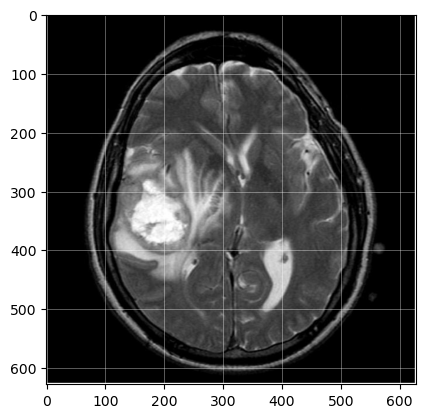

In [2]:
image_dir = r'C:\Users\Chris\Desktop\data\tum.jpg'

image = mpimg.imread(image_dir)
plt.imshow(image, cmap='gray')
plt.grid(color='white', linestyle='-', linewidth=0.5, alpha=0.5)
plt.show()

In [3]:
cv2.imread(image_dir).shape

(628, 628, 3)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = r'C:\Users\Chris\Desktop\data\training'
val_dir = r'C:\Users\Chris\Desktop\data\validating'

# Data augmentation for training set
train = ImageDataGenerator(rescale=1/255, horizontal_flip=True)
validation = ImageDataGenerator(rescale=1/255)

# Load datasets
train_dataset = train.flow_from_directory(train_dir,
                                          target_size=(200, 200),
                                          batch_size=32,
                                          class_mode='binary')
validation_dataset = validation.flow_from_directory(val_dir,
                                          target_size=(200, 200),
                                          batch_size = 32,
                                          class_mode = 'binary')

Found 3342 images belonging to 2 classes.
Found 836 images belonging to 2 classes.


In [5]:
train_dataset.class_indices

{'cancerfree': 0, 'glioblastoma': 1}

In [6]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1])

In [7]:
model = tf.keras.models.Sequential([
                                tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)),
                                tf.keras.layers.MaxPool2D(2, 2),
                                #
                                tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
                                tf.keras.layers.MaxPool2D(2, 2),
                                #
                                tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                tf.keras.layers.MaxPool2D(2, 2),
                                ##
                                tf.keras.layers.Flatten(),
                                #
                                tf.keras.layers.Dense(512, activation='relu'),
                                ##
                                tf.keras.layers.Dense(1, activation='sigmoid'),
                                ])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [9]:
model.compile(optimizer = 'Adam',
              loss= 'binary_crossentropy',
              metrics = ['accuracy'])

In [10]:
history = model.fit(train_dataset,
                          batch_size=32,
                          epochs=10,
                          validation_data=validation_dataset)

Epoch 1/10
105/105 [==============================] - 138s 1s/step - loss: 0.5137 - accuracy: 0.7499 - val_loss: 0.3786 - val_accuracy: 0.8110
Epoch 2/10
105/105 [==============================] - 131s 1s/step - loss: 0.2449 - accuracy: 0.9028 - val_loss: 0.1894 - val_accuracy: 0.9294
Epoch 3/10
105/105 [==============================] - 124s 1s/step - loss: 0.1833 - accuracy: 0.9297 - val_loss: 0.2613 - val_accuracy: 0.8852
Epoch 4/10
105/105 [==============================] - 125s 1s/step - loss: 0.1023 - accuracy: 0.9647 - val_loss: 0.1045 - val_accuracy: 0.9605
Epoch 5/10
105/105 [==============================] - 128s 1s/step - loss: 0.0732 - accuracy: 0.9740 - val_loss: 0.0609 - val_accuracy: 0.9773
Epoch 6/10
105/105 [==============================] - 136s 1s/step - loss: 0.0435 - accuracy: 0.9874 - val_loss: 0.0755 - val_accuracy: 0.9653
Epoch 7/10
105/105 [==============================] - 137s 1s/step - loss: 0.0348 - accuracy: 0.9895 - val_loss: 0.0422 - val_accuracy: 0.9844

In [13]:
model.save('my_model.h5')


In [14]:
from tensorflow.keras.models import load_model
model = load_model('my_model.h5')


In [15]:
loss, accuracy = model.evaluate(train_dataset, steps=len(train_dataset))
print("Test Accuracy: ", accuracy)
print("Test loss: ", loss)

105/105 [==============================] - 33s 307ms/step - loss: 0.0058 - accuracy: 0.9991
Test Accuracy:  0.9991023540496826
Test loss:  0.005827507469803095


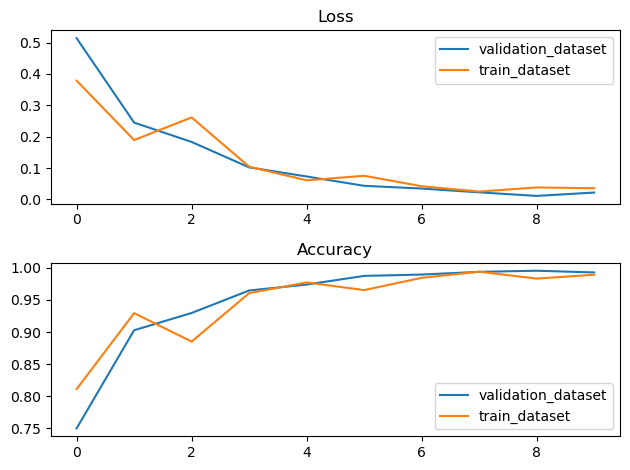

In [16]:
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='validation_dataset')
pyplot.plot(history.history['val_loss'], label='train_dataset')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='validation_dataset')
pyplot.plot(history.history['val_accuracy'], label='train_dataset')
pyplot.legend()

plt.tight_layout()
pyplot.show()

In [17]:
from sklearn.model_selection import KFold

model.compile(optimizer = 'Adam',
              loss= 'binary_crossentropy',
              metrics = ['accuracy'])

num_folds = 5
num_channels = 20

kfold = KFold(n_splits=num_folds, shuffle = True)

accuracies = []
precisions = []
recalls = []
f1_scores = []

for fold_index, (train_indices, test_indices) in enumerate(kfold.split(range(num_folds))):
    print(f"Training Fold {fold_index + 1}...")


    accuracy = model.evaluate(validation_dataset)
    predictions = model.predict(validation_dataset)
    y_val = validation_dataset.classes
    y_pred = np.round(predictions)

    precision = tf.keras.metrics.Precision()(y_val, y_pred).numpy()
    recall = tf.keras.metrics.Recall()(y_val, y_pred).numpy()
    f1_score = 2 * (precision * recall) / (precision + recall)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

    average_accuracy = np.mean(accuracies)
    average_precision = np.mean(precisions)
    average_recall = np.mean(recalls)
    average_f1_score = np.mean(f1_scores)
print()
print()
print(f"Average Accuracy: {average_accuracy}")
print(f"Average Precision: {average_precision}")
print(f"Average Recall: {average_recall}")
print(f"Average F1 Score: {average_f1_score}")

Training Fold 1...
27/27 [==============================] - 7s 245ms/step
Training Fold 2...
27/27 [==============================] - 7s 247ms/step
Training Fold 3...
27/27 [==============================] - 7s 245ms/step
Training Fold 4...
27/27 [==============================] - 7s 246ms/step
Training Fold 5...
27/27 [==============================] - 7s 243ms/step


Average Accuracy: 0.5125207260251046
Average Precision: 0.512895405292511
Average Recall: 0.5043061971664429
Average F1 Score: 0.5085645345110479


In [18]:
import tensorflow as tf
import tensorflow_hub as hub

feature_extractor = hub.KerasLayer(model, input_shape=(200, 200, 3), trainable = False)

model = tf.keras.Sequential([feature_extractor])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1)                 17358881  
                                                                 
Total params: 17,358,881
Trainable params: 0
Non-trainable params: 17,358,881
_________________________________________________________________


In [21]:
from tensorflow.keras.utils import plot_model

# Visualize the model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [20]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


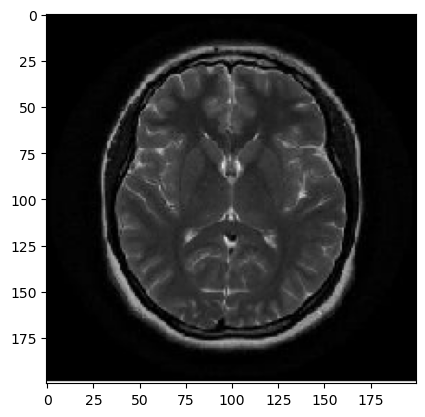

1/1 [==============================] - 0s 226ms/step
For image test1.jpg: From my analysis, you are healthy


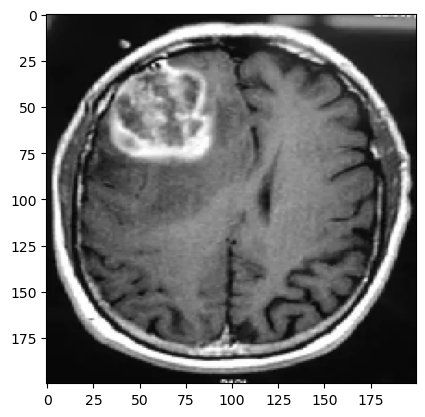

1/1 [==============================] - 0s 72ms/step
For image test2.jpg: From my analysis, you have a brain tumor


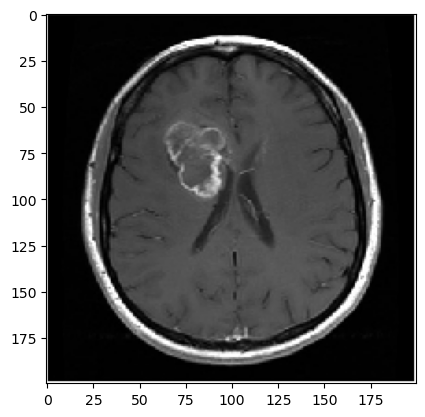

1/1 [==============================] - 0s 64ms/step
For image test3.jpg: From my analysis, you have a brain tumor


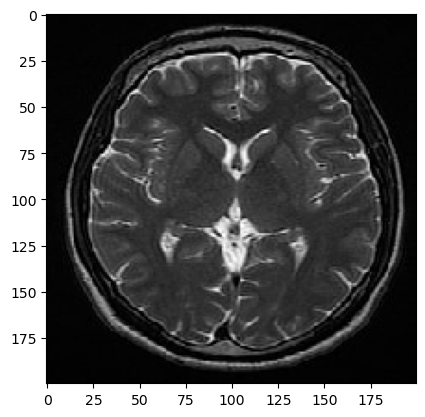

1/1 [==============================] - 0s 64ms/step
For image test4.jpg: From my analysis, you are healthy


In [22]:
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import os


test_dir = r'C:\Users\Chris\Desktop\data\testing'

dir_path = test_dir

for i in os.listdir(dir_path):
    img_path = os.path.join(dir_path, i)

    img = load_img(img_path, target_size=(200, 200))
    plt.imshow(img)
    plt.show()


# Convert the image to an array and expand dimensions
    X = img_to_array(img)
    X = np.expand_dims(X, axis=0)

    # Predict using the model
    val = model.predict(X)

    # Define the threshold for classification
    threshold = 0.5

    # Print the prediction result
    if val < threshold:
        print(f"For image {i}: From my analysis, you are healthy")
    else:
        print(f"For image {i}: From my analysis, you have a brain tumor")
